In [10]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
DATA_DIR = '/home/suraj/Learning/Dataset/man_vs_women'
IMG_SIZE = 128
BATCH_SIZE = 32

In [12]:
classes = os.listdir(DATA_DIR)
print(classes)

['women', 'men']


In [13]:
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_ds = image_dataset_from_directory(
                DATA_DIR,
                labels="inferred",
                label_mode="binary",
                class_names=classes,
                image_size=(IMG_SIZE, IMG_SIZE),
                validation_split=0.1,
                seed=1337,
                subset="training"
            )

val_ds =  image_dataset_from_directory(
                DATA_DIR,
                labels="inferred",
                label_mode="binary",
                class_names=classes,
                image_size=(IMG_SIZE, IMG_SIZE),
                validation_split=0.1,
                seed=1337,
                subset="validation"
            )

Found 3330 files belonging to 2 classes.
Using 2997 files for training.
Found 3330 files belonging to 2 classes.
Using 333 files for validation.


In [22]:
for images, labels in train_ds.take(1):
    print(type(labels))

2022-02-10 18:58:34.566316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


<class 'tensorflow.python.framework.ops.EagerTensor'>


In [16]:
class_names = train_ds.class_names    
print(class_names)

['women', 'men']


2022-02-10 18:56:24.568855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


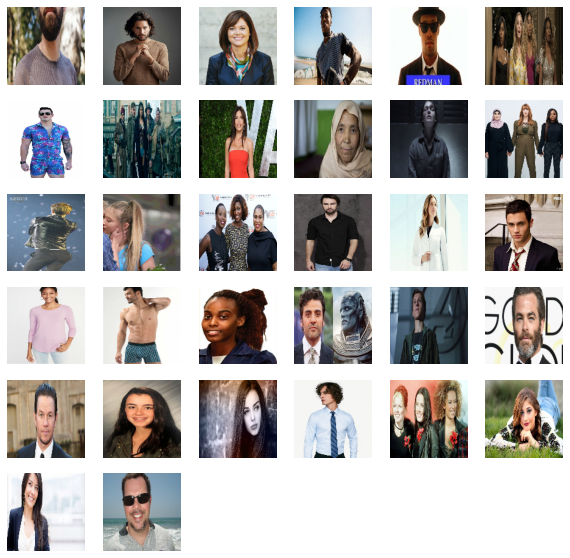

In [17]:
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

In [34]:
model = Sequential()
model.add(Rescaling(1./255))
model.add(Conv2D(64, (4,4), strides=(2,2), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (4,4), strides=(2,2), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, (4,4), strides=(2,2), activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="softmax"))

In [35]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [36]:
histroy = model.fit(train_ds, epochs=1, batch_size=32, validation_data=val_ds)

2022-02-10 19:08:48.594559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/94 [>.............................] - ETA: 21s - loss: 0.6859 - accuracy: 0.3984

2022-02-10 19:08:49.746114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/94 [===>..........................] - ETA: 16s - loss: 0.6814 - accuracy: 0.4104

Corrupt JPEG data: 5 extraneous bytes before marker 0xee
2022-02-10 19:08:51.965012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/94 [=====>........................] - ETA: 16s - loss: 0.6815 - accuracy: 0.4167

2022-02-10 19:08:53.422909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/94 [======>.......................] - ETA: 16s - loss: 0.6799 - accuracy: 0.4105

2022-02-10 19:08:53.701140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/94 [=======>......................] - ETA: 14s - loss: 0.6827 - accuracy: 0.4230

2022-02-10 19:08:54.772249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/94 [=========>....................] - ETA: 12s - loss: 0.6831 - accuracy: 0.4292

2022-02-10 19:08:56.036725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/94 [==================>...........] - ETA: 8s - loss: 0.6831 - accuracy: 0.4281

Corrupt JPEG data: 6 extraneous bytes before marker 0xed


64/94 [===================>..........] - ETA: 6s - loss: 0.6834 - accuracy: 0.4302

Corrupt JPEG data: 6 extraneous bytes before marker 0xed


70/94 [=====================>........] - ETA: 5s - loss: 0.6838 - accuracy: 0.4313

2022-02-10 19:09:04.806331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


94/94 [==============================] - ETA: 0s - loss: 0.6799 - accuracy: 0.4248

2022-02-10 19:09:09.756427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


94/94 [==============================] - 23s 231ms/step - loss: 0.6799 - accuracy: 0.4248 - val_loss: 0.6618 - val_accuracy: 0.4354


Text(0.5, 0, 'test')

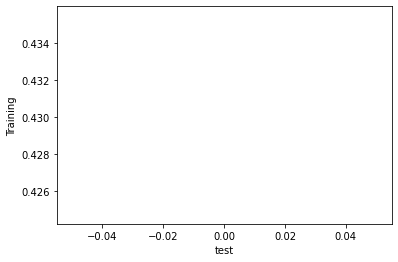

In [37]:
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.ylabel('Training')
plt.xlabel('test')

In [38]:
loss, accuracy = model.evaluate(val_ds)

2022-02-10 19:09:17.189748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/11 [==============================] - 2s 35ms/step - loss: 0.6618 - accuracy: 0.4354


In [39]:
print(loss)

0.6617885231971741


In [71]:
#testing

In [78]:
def predict_image(filepath):
    img_array = cv2.imread(filepath)
    plt.imshow(image.load_img(filepath))
    plt.axis("off")
    resized_array = cv2.resize(img_array, (128, 128))
    return resized_array.reshape(-1, 128, 128, 3)

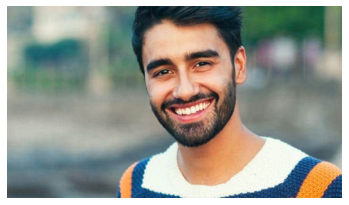

In [83]:
predictions = model.predict([predict_image('/home/suraj/Learning/Dataset/men1.jpg')])

In [84]:
print(class_names[int(predictions.tolist()[0][0])])

men
